# Preliminary analysis

## Utility functions

In [1]:
from pandas import read_csv
# load the dataset
def load_smallECAI(full_path='../data/XAI Fintech risk/smaller_dataset.csv'):
    dataset = pd.read_csv(full_path)
    dataset = dataset.drop(['Unnamed: 0', 'X1', 'nace', 'ratio036', 'ratio037', 'ratio039', 'ratio040'], axis=1)
    return dataset

def load_fullECAI(full_path='../data/XAI Fintech risk/final_dataset_smes.xlsx'):
    dataset = pd.read_excel(full_path, sheet_name=0)
    dataset = dataset.drop(['Unnamed: 0', 'V_16', 'V_17', 'V_18', 'V_19', 'V_24'], axis=1)
    return dataset

In [122]:
# spot check machine learning algorithms on the german credit dataset
from sklearn.metrics import fbeta_score, roc_auc_score, make_scorer, balanced_accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)
 
# evaluate a model
def evaluate_model(X, y, model, metric=f2_measure, splits=5, reps=3, seed=None):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=splits, n_repeats=reps, random_state=seed)
    # define the model evaluation metric
    scorer = make_scorer(metric)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1)
    return scores

In [22]:
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    # XGB
    models.append(XGBClassifier(use_label_encoder=False))
    names.append('XGB')
    return models, names

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

seed = 0
pd.set_option('display.max_columns', None)

In [5]:
dataset = load_fullECAI()
dataset.describe()

,status,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_20,V_21,V_22,V_23
count,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000,15045.000000
mean,0.108475,8.894744,1.258207,1.462277,1.541156,1.189098,7.841478,23.228248,0.028451,-0.065396,1.368502,1.331122,0.194618,37.094463,0.062512,0.069327,104.540047,76.215487,95.752742,3397.433034
std,0.310989,19.381710,3.341354,0.798856,1.212106,1.007325,23.882682,72.012435,0.146681,0.792478,1.060359,1.055996,0.494868,93.111214,0.196162,0.219726,351.177911,114.619017,132.276740,7532.012991
min,0.000000,-67.150000,-9.590000,0.100000,0.000000,-0.020000,-33.140000,-285.860000,-1.340000,-8.930000,0.000000,0.000000,-3.490000,-208.860000,-2.080000,-2.660000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,1.250000,0.000000,1.070000,0.970000,0.620000,0.940000,1.250000,0.010000,0.000000,0.690000,0.660000,0.010000,2.530000,0.020000,0.020000,0.000000,0.000000,0.000000,602.000000
50%,0.000000,3.730000,0.060000,1.200000,1.220000,0.980000,1.750000,3.610000,0.030000,0.070000,1.160000,1.120000,0.100000,7.450000,0.060000,0.060000,20.000000,51.000000,67.000000,1146.000000
75%,0.000000,9.850000,1.170000,1.540000,1.720000,1.400000,4.790000,16.830000,0.070000,0.210000,1.740000,1.700000,0.380000,28.410000,0.110000,0.120000,80.000000,100.000000,135.000000,2759.000000
max,1.000000,207.090000,33.380000,8.270000,15.890000,10.910000,300.770000,571.220000,0.510000,1.280000,8.500000,8.500000,3.950000,750.360000,0.940000,1.410000,5569.000000,1493.000000,1531.000000,79454.000000


In [6]:
# Correlation with target
dataset.corr().loc[:,'status']

status    1.000000
V_1       0.003299
V_2       0.006055
V_3      -0.171944
V_4      -0.139699
V_5      -0.138813
V_6      -0.027045
V_7      -0.125845
V_8      -0.388083
V_9      -0.292914
V_10     -0.032936
V_11     -0.026330
V_12     -0.083087
V_13     -0.117566
V_14     -0.319020
V_15     -0.295908
V_20      0.034503
V_21      0.215793
V_22      0.103322
V_23     -0.060855
Name: status, dtype: float64

No se muestran pero las variable de constraints (eliminadas por los autores originales) presentan un alta correlación con el status

In [7]:
# Prep data
X = dataset.drop('status', axis=1)
y = dataset.loc[:, 'status']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed, stratify=y)

## Baseline

### Dummy Classifier

In [9]:
model = DummyClassifier(strategy='constant', constant=1)
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean F2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F2: 0.378 (0.001)


### Logistic Regression

In [128]:
model = LogisticRegression(max_iter=1000)
norm = Normalizer()
model = Pipeline([('nr', norm),('lr', model)])
scores = evaluate_model(X, y, model, balanced_accuracy_score)
print('min:', np.min(scores))
print('max:', np.max(scores))
print('mean:', np.mean(scores))

min: 0.8886673313393154
max: 0.8939847125290794
mean: 0.8918134485432591


In [129]:
model.fit(X_train, y_train)


Pipeline(steps=[('nr', Normalizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [136]:
balanced_accuracy_score(y_test, model.predict(X_test))

0.6793752529560125

## Modeling

### XGboost

In [131]:
%%time
model = XGBClassifier(use_label_encoder=False, max_depht=10)
scores = evaluate_model(X, y, model, roc_auc_score, splits=5, reps=3, seed=seed)

print('min:', np.min(scores))
print('max:', np.max(scores))
print('mean:', np.mean(scores))

min: 0.6584190620791213
max: 0.7020086708176224
mean: 0.6803588081810469
Wall time: 5.28 s


In [132]:
model.fit(X_train, y_train)

[13:10:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "max_depht" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:10:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depht=10, max_depth=6, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=12, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [133]:
balanced_accuracy_score(y_test, model.predict(X_test))

0.6793752529560125

## Shap Values

In [12]:
import shap

%%time
explainer = shap.Explainer(model.named_steps['lr'], model.named_steps['nr'].transform(X_train))
shap_test = explainer(model.named_steps['nr'].transform(X_train))
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_train.index)
shap_df

In [96]:
%%time
explainer = shap.Explainer(model.named_steps['lr'], model.named_steps['nr'].transform(X_train))
shap_test = explainer(model.named_steps['nr'].transform(X_train))
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_train.index)
shap_df

Wall time: 312 ms


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
6438,0.001264,-0.000009,0.000097,0.000479,0.000281,-0.003894,0.027168,-0.000006,-0.000258,-0.000296,-0.000293,0.000102,0.065864,0.000002,0.000003,-0.031721,-0.156098,-0.013617,0.001323
8447,0.007585,0.000025,0.000091,0.000541,0.000425,-0.004934,0.066804,0.000025,0.000490,0.000169,0.000208,0.000012,0.099640,0.000018,0.000018,0.014790,0.217818,-0.032674,0.001125
2700,0.002787,0.000011,0.000147,0.000719,0.000449,-0.003466,0.053014,-0.000003,-0.000269,-0.000895,-0.000876,0.000005,0.090228,0.000007,0.000007,-0.035375,-0.263173,-0.048652,0.001372
10806,0.001912,0.000011,-0.000169,-0.002330,-0.001908,-0.000737,-0.338196,-0.000037,-0.000511,0.000488,0.000533,0.000004,-0.216331,-0.000017,-0.000017,-0.035375,-0.210456,0.045796,0.000807
7630,-0.003678,0.000011,0.000084,0.000535,0.000309,-0.004079,0.007305,-0.000020,-0.000752,0.001617,0.001682,-0.000005,0.060600,0.000002,0.000002,-0.034991,-0.088168,-0.035926,0.001344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.008475,0.000197,0.000109,0.000558,0.000324,-0.003941,0.025936,-0.000012,0.001647,-0.000543,-0.000433,-0.000101,0.074072,0.000004,0.000004,-0.035375,0.058175,0.030135,0.001089
5415,0.002539,0.000010,0.000087,0.000538,0.000341,-0.003802,-0.066790,-0.000010,-0.000315,-0.000425,-0.000397,0.000005,0.007911,0.000002,0.000003,-0.030048,-0.149577,-0.023501,0.001327
441,0.002359,-0.000004,0.000073,0.000664,0.000459,-0.004106,0.024707,-0.000007,-0.000289,-0.000922,-0.000920,-0.000061,0.072686,-0.000010,-0.000018,0.043105,0.015030,0.043052,0.000853
14620,-0.012418,-0.000024,0.000022,0.000461,0.000253,-0.004132,0.029033,-0.000003,-0.000310,-0.000591,-0.000566,0.000197,0.057214,-0.000026,-0.000028,-0.031337,0.763910,0.286707,-0.004329


In [137]:
%%time
explainer = shap.TreeExplainer(model, X_train)
shap_test = explainer(X_train)
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_train.index)
shap_df

 97%|=================== | 11648/12036 [00:29<00:00]       

Wall time: 29.4 s


,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_20,V_21,V_22,V_23
6438,-0.095676,-0.106716,-0.141746,-0.486434,-0.232723,0.026263,0.147125,-0.264168,-0.036772,-0.369077,-0.162701,0.348720,0.024675,-0.083711,-0.049551,-0.144136,0.036520,0.073813,-0.057448
8447,-0.162335,-0.157259,0.867052,0.554431,0.262183,0.632948,0.212332,-0.168978,-0.163717,-0.210013,-0.156250,-0.000664,0.567826,-0.341759,0.052423,-0.096697,0.331587,-0.171574,-0.245758
2700,-0.053485,0.040762,-0.451463,-0.447562,0.156651,0.696083,-0.181576,0.406479,0.127528,0.015853,-0.064722,-0.030535,1.826731,-0.342164,-0.061351,0.087326,-0.037846,-0.191445,-0.023236
10806,-0.149111,0.166139,-0.687211,-1.191114,0.433938,-0.342908,-0.188250,0.150403,-0.149794,-0.030835,0.048034,-0.033920,-0.597619,0.368282,0.135789,0.190915,-0.085861,0.188063,0.108766
7630,0.298382,0.063804,0.230171,0.680485,-0.018602,-0.359351,0.089372,0.191622,-0.768958,1.019929,0.568447,-0.176759,0.179517,-0.209978,-0.083704,-0.175082,0.084783,-0.268030,-0.268043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-0.253207,0.382031,1.606271,0.629502,-0.071038,-0.403783,0.158122,0.233553,0.832274,-0.087697,-0.015945,0.682514,1.046346,-0.174571,0.017086,0.126577,0.825173,0.490294,0.094814
5415,-0.098121,-0.007773,-0.480781,-0.336833,-0.198435,0.003540,0.111661,-0.089114,0.034432,0.124707,0.017683,-0.104508,-0.923250,-0.266663,-0.102176,-0.179494,-0.003057,0.197074,-0.308153
441,0.015916,-0.060546,-0.472312,0.694948,0.873793,-0.676827,0.116020,-0.504672,0.282788,-0.309824,-0.120568,0.606744,1.559011,0.477122,0.074342,0.511243,0.604557,0.928186,0.341870
14620,0.291194,-0.106471,-0.042065,0.572100,-0.088294,-0.009089,-0.087551,-0.337990,0.016385,-0.488906,-0.130453,0.583651,0.464433,-0.203946,-0.217992,-0.193027,0.972856,-0.066343,0.052154


## Graph representation

In [80]:
from igraph import Graph
import igraph as ig
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt

In [138]:
%%time
shap_dist = euclidean_distances(shap_df)

fullg = Graph.Weighted_Adjacency(shap_dist, mode='undirected')
mst = fullg.spanning_tree(fullg.es['weight'])
colors = np.array(['#808080']*y_train.shape[0])
colors[y_train == 1] = '#FF0000'
mst.vs['color'] = colors.tolist()

Wall time: 2min


In [ ]:
#mst.layout_davidson_harel()

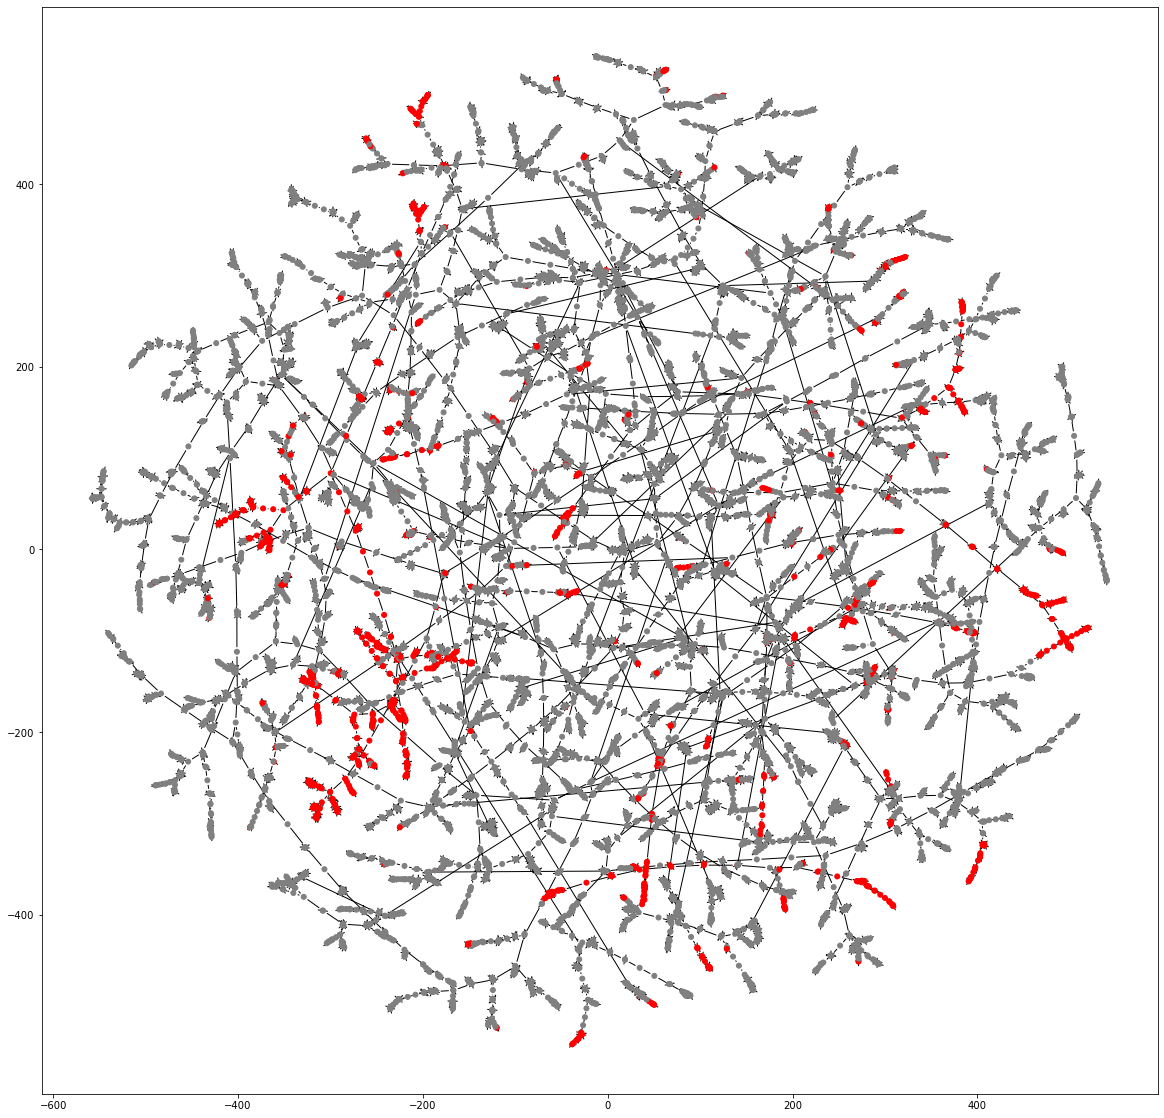

In [139]:
fig, ax = plt.subplots(figsize=(20, 20))
ig.plot(mst, target=ax, vertex_color = mst.vs['color'])

## Alternative models

In [123]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import InstanceHardnessThreshold

In [126]:
def get_models():
    models, names = list(), list()
    # TL
    models.append(TomekLinks())
    names.append('TL')
    # ENN
    models.append(EditedNearestNeighbours())
    names.append('ENN')
    # RENN
    models.append(RepeatedEditedNearestNeighbours())
    names.append('RENN')
    # OSS
    models.append(OneSidedSelection())
    names.append('OSS')
    # NCR
    models.append(NeighbourhoodCleaningRule())
    names.append('NCR')
    # IHT
    models.append(InstanceHardnessThreshold())
    names.append('IHT')
    return models, names

In [127]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # define model to evaluate
    model = LogisticRegression(solver='liblinear', class_weight='balanced')
    # scale, then undersample, then fit model
    pipeline = Pipeline(steps=[('nr',norm), ('s', models[i]), ('m',model)])
    # evaluate the model and store results
    pipeline.fit(X_train, y_train)
    print(balanced_accuracy_score(y_test, model.predict(X_test)))

X has feature names, but LogisticRegression was fitted without feature names


0.6675123305337629


X has feature names, but LogisticRegression was fitted without feature names


0.631065513606461


X has feature names, but LogisticRegression was fitted without feature names


0.6259760957997298


X has feature names, but LogisticRegression was fitted without feature names


0.6711817647583398


X has feature names, but LogisticRegression was fitted without feature names


0.6384752669043214
0.6088625497051419


X has feature names, but LogisticRegression was fitted without feature names


In [117]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import InstanceHardnessThreshold

In [120]:
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# define the data sampling
sampling = InstanceHardnessThreshold()
# scale, then sample, then fit model
model = Pipeline(steps=[('nr',norm), ('s', sampling), ('m',model)])

In [121]:
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      2683
           1       0.20      0.62      0.30       326

    accuracy                           0.69      3009
   macro avg       0.57      0.66      0.55      3009
weighted avg       0.86      0.69      0.75      3009

